# 1. Loading Data

The goal of this exploratory data analysis is to understand customer behavior patterns that contribute to churn.

This includes:
- Understanding the distibution of the target variable (Churn)
- Assessing data quality issues
- Identifying features that may be predictive of churn
- Generating insights to inform feature engineering and modeling

In [22]:
import sys
print(sys.executable)


c:\Users\julia\Documents\ds-personal-projects\customer-churn-prediction\.venv\Scripts\python.exe


In [23]:
import pandas as pd

DATA_PATH = "../data/raw/telco_churn.csv"
df = pd.read_csv(DATA_PATH)

df.head(), df.shape


(   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovies      

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2. Data Overview

- The dataset contains customer-level information including demographics, service usage, and billing details.
- Both numberical and categorical features are present
- The target variable is "Churn", indicating whether a customer has left the service.

# 3. Target Variable: Churn

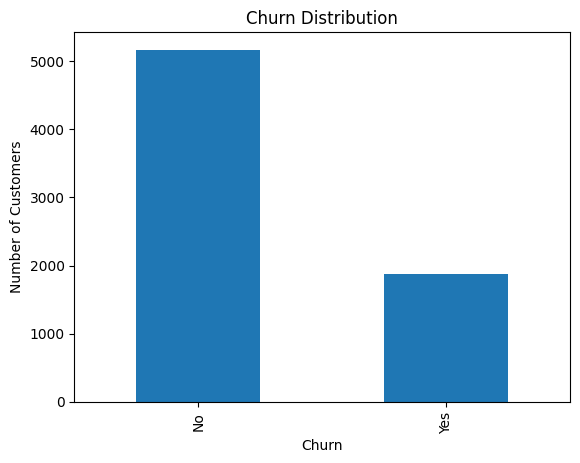

In [25]:
df["Churn"].value_counts(normalize=True)

import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


## Interpretation:
- The dataset is moderately imbalanced, with fewer churned customers than retained customers.
- This imbalance should be considered during modeling and evaluation.

# 4. Data Quality Checks

In [26]:
# Missing values
df.isnull().sum().sort_values(ascending=False)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
# Duplicates
df.duplicated().sum()

np.int64(0)

### Interpretation:
- No significant missing values were found.
- No duplicate records were detected.

# 5. Numeric Features Analysis

Focusing on key numeric features:
- tenure
- MonthlyCharges
- TotalCharges

In [ ]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce") #Convert dtype from object to numeric

numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

df[numeric_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


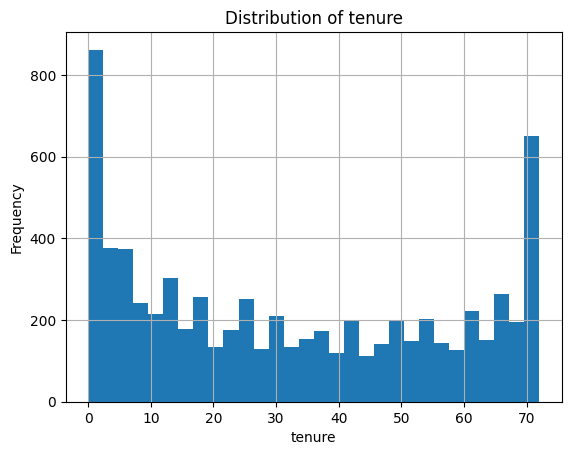

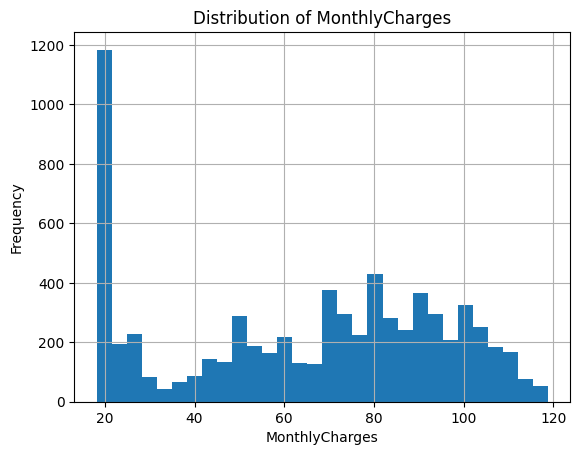

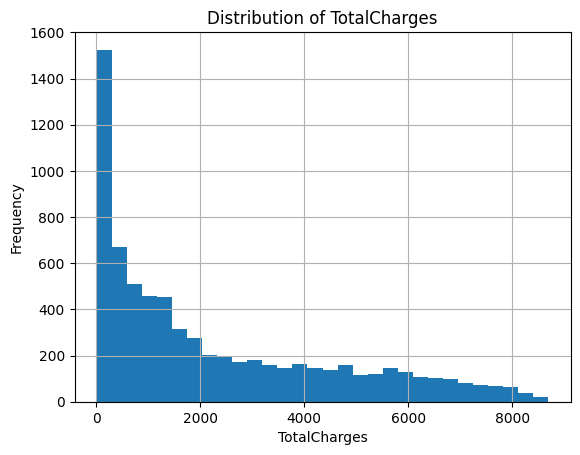

In [33]:
for col in numeric_cols:
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Interpretation

- Tenure is bimodal, with a high concentration of cutomers in he very early months (0-5 months) and another concentration among long-tenured customers nearing the maximum tenure. This implies that customers either churn early or remain subscribed for a long period of time once retained. Tenure is therefore a strong predictor of churn, particularly in distinguishing early-stage customers from long-term subscribers

- MonthlyCharges exhibits a multi-modal distribution, indicating the presence of distinct pricing tiers corresponding to different service packages. A large cluster of customers is concentrated at lower monthly charges, while higher charges are spread across several peaks. This suggest that pricing structure and service selection may play a role in churn behavior.

- TotalCharges is heavily right-skewed, with many customers accumulating low total charges and a long tail representing customers with extended tenure and hihger cumulative spreading. Since TotalCharges is closely related to tenure and MonthlyCharges, this feature may introduce multicollinearity and should be handled carefully during modeling.

# 6. Categorical Features Analysis

Relevant categorical features selected: 
- Contract
- InternetService
- PaymentMethod
- OnlineSecurity

In [36]:
cat_cols = ["Contract","InternetService","PaymentMethod", "OnlineSecurity"]

for col in cat_cols:
    print(df[col].value_counts())

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


# 7. Bivariate Analysis

In [41]:
# Convert Churn column values from "No/Yes" to 0/1 for normalization

df["Churn_binary"]= df["Churn"].map({"Yes":1,"No":0})
df["Churn_binary"].dtype

dtype('int64')

### Churn Rate by Categorical Feature

In [ ]:
for col in cat_cols:
    churn_rate = df.groupby(col)["Churn_binary"].mean().sort_values(ascending=False)
    print(f"\nChurn rate by {col}")
    print(churn_rate)


Churn rate by Contract
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn_binary, dtype: float64

Churn rate by InternetService
InternetService
Fiber optic    0.418928
DSL            0.189591
No             0.074050
Name: Churn_binary, dtype: float64

Churn rate by PaymentMethod
PaymentMethod
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: Churn_binary, dtype: float64

Churn rate by OnlineSecurity
OnlineSecurity
No                     0.417667
Yes                    0.146112
No internet service    0.074050
Name: Churn_binary, dtype: float64


### Visualizing Churn Rate per Category

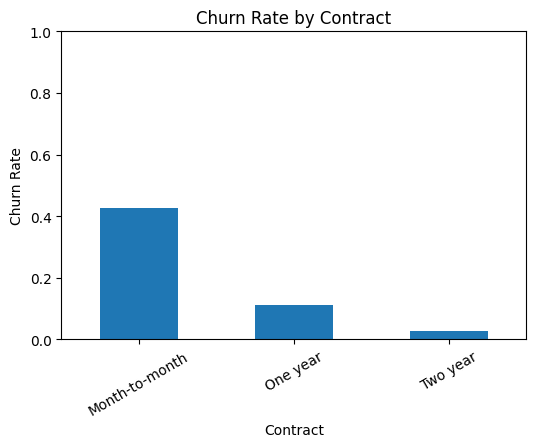

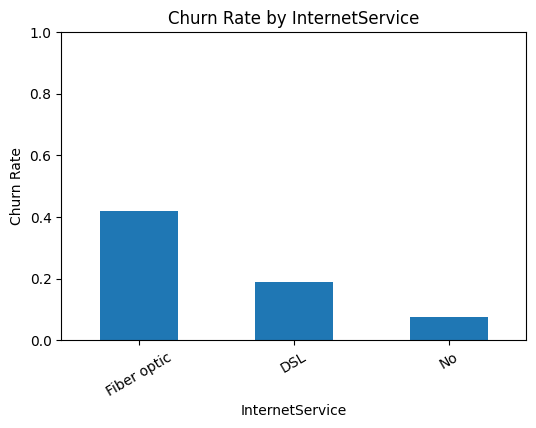

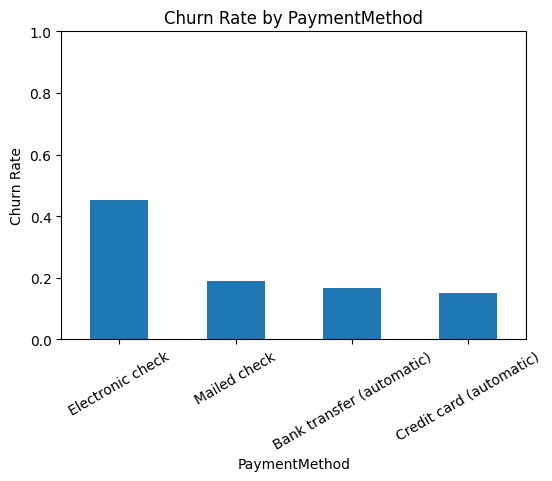

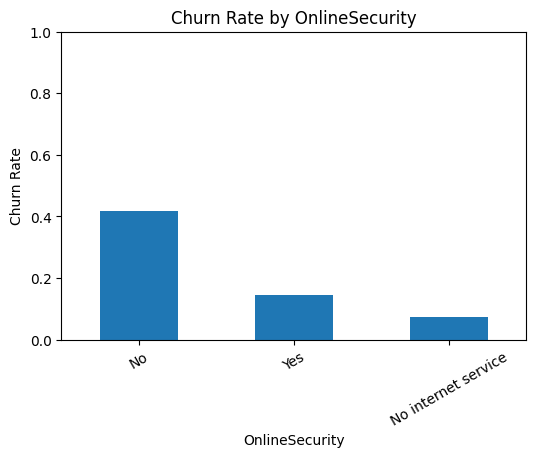

In [52]:
for col in cat_cols:
    churn_rate = df.groupby(col)["Churn_binary"].mean().sort_values(ascending=False)
    plt.figure(figsize=(6,4))
    churn_rate.plot(kind="bar")
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.ylim(0,1)
    plt.show()
